<a href="https://colab.research.google.com/github/alina-bogdanovskaya/Data-Analysis_May2022/blob/lesson7/Data_Analysis_KNN%2C_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [200]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]

In [201]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

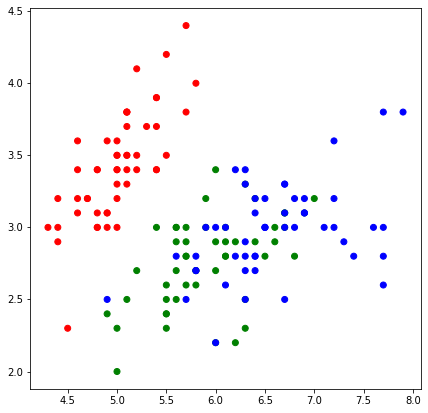

In [202]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [203]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

In [204]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [205]:
def knn_weighted(x_train, y_train, x_test, k):

    answers = []
    q = 0.02
    a = 0.5
    b = 2

    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
       
        for d in sorted(test_distances)[0:k]:
            # weight = q**d[0]
            weight = 1/((d[0] + a)**b)
            classes[d[1]] += weight
            
        # Записываем в список ответов наибольшее расстояние
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [206]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [207]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [208]:
accuracy_measure = []
accuracy_measure_weighted = []

for k in range(1, 11):
  y_pred = knn(X_train, y_train, X_test, k)
  y_pred_2 = knn_weighted(X_train, y_train, X_test, k)
  accuracy_measure.append(accuracy(y_pred, y_test))
  accuracy_measure_weighted.append(accuracy(y_pred_2, y_test))

  print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
  print(f'Точность алгоритма с учетом весов при k = {k}: {accuracy(y_pred_2, y_test):.3f}')

Точность алгоритма при k = 1: 0.667
Точность алгоритма с учетом весов при k = 1: 0.667
Точность алгоритма при k = 2: 0.667
Точность алгоритма с учетом весов при k = 2: 0.733
Точность алгоритма при k = 3: 0.733
Точность алгоритма с учетом весов при k = 3: 0.733
Точность алгоритма при k = 4: 0.833
Точность алгоритма с учетом весов при k = 4: 0.767
Точность алгоритма при k = 5: 0.867
Точность алгоритма с учетом весов при k = 5: 0.833
Точность алгоритма при k = 6: 0.833
Точность алгоритма с учетом весов при k = 6: 0.867
Точность алгоритма при k = 7: 0.800
Точность алгоритма с учетом весов при k = 7: 0.767
Точность алгоритма при k = 8: 0.800
Точность алгоритма с учетом весов при k = 8: 0.833
Точность алгоритма при k = 9: 0.867
Точность алгоритма с учетом весов при k = 9: 0.867
Точность алгоритма при k = 10: 0.833
Точность алгоритма с учетом весов при k = 10: 0.867


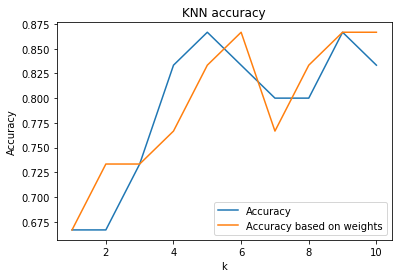

In [209]:
plt.plot(range(1, 11), accuracy_measure, label='Accuracy')
plt.plot(range(1, 11), accuracy_measure_weighted, label='Accuracy based on weights')
plt.title('KNN accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [210]:
X, y = make_blobs(n_samples=100, random_state=1)

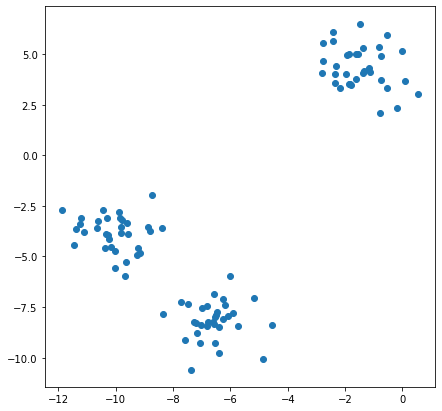

In [211]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [212]:
def kmeans(data, k, max_iterations, min_distance):
       
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения с новыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [213]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [214]:
def SSE(centroids, clusters):
    sse = 0
    for i, centroid in enumerate(centroids):
        clusterwise_distances = []
    
        for point in clusters[i]:
            sq_distance = np.square(e_metrics(centroid, point))
            clusterwise_distances.append(sq_distance)
    
        sse += np.sum(clusterwise_distances) 
    
    return sse

In [215]:
sse_measure = []
max_iterations = 10
min_distance = 1e-4

for k in range(1, 11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance) 
    sse_measure.append(SSE(centroids, clusters))

sse_measure

[4118.153777704471,
 661.5698490972001,
 156.28289251170003,
 139.3741146136838,
 126.57537841891627,
 115.8130108490437,
 101.33706078363487,
 98.00829163101346,
 72.88769594879396,
 58.46251834933362]

In [216]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 10, n_init = 10, random_state = 1)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
    print(kmeans.inertia_)


4118.153777704471
661.5698490972004
156.28289251170003
130.96121900774804
112.3482098903684
97.4661085352347
81.95148611237343
68.84208083839681
61.34589112585951
55.774735135553414


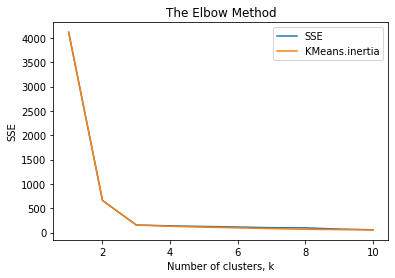

In [219]:
plt.plot(range(1, 11), sse_measure, label='SSE')
plt.plot(range(1, 11), cs, label='KMeans.inertia')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters, k')
plt.ylabel('SSE')
plt.legend(loc='upper right')
